# Predicting Draft Picks

Now that I have all my data, I need to combine my two dataframes and start cleaning. I load in my necessary libraries and read in the two csv files saved off in my web scraping notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# setting format for readability
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
combine = pd.read_csv('2000-2020_nfl_combine_data.csv', index_col = 0)
combine.head()

,Link,PlayerName,Position,School,CollegeStats,Height,Weight,40yd,Vertical,Bench,BroadJump,3Cone,Shuttle,Drafted,CombineYear,Draft Team,Round,Pick,Draft Year
0,https://www.pro-football-reference.com/draft/2...,John Abraham,OLB,South Carolina,/td,6-4,252,4.55,nan,nan,nan,nan,nan,New York Jets / 1st / 13th pick / 2000,2000,New York Jets,1st,13th pick,2000
1,https://www.pro-football-reference.com/draft/2...,Shaun Alexander,RB,Alabama,https://www.sports-reference.com/cfb/players/s...,6-0,218,4.58,nan,nan,nan,nan,nan,Seattle Seahawks / 1st / 19th pick / 2000,2000,Seattle Seahawks,1st,19th pick,2000
2,https://www.pro-football-reference.com/draft/2...,Darnell Alford,OT,Boston Col.,/td,6-4,334,5.56,25.00,23.00,94.00,8.48,4.98,Kansas City Chiefs / 6th / 188th pick / 2000,2000,Kansas City Chiefs,6th,188th pick,2000
3,https://www.pro-football-reference.com/draft/2...,Kyle Allamon,TE,Texas Tech,/td,6-2,253,4.97,29.00,nan,104.00,7.29,4.49,NaN,2000,NaN,Not Drafted,Not Drafted,Not Drafted
4,https://www.pro-football-reference.com/draft/2...,Rashard Anderson,CB,Jackson State,/td,6-2,206,4.55,34.00,nan,123.00,7.18,4.15,Carolina Panthers / 1st / 23rd pick / 2000,2000,Carolina Panthers,1st,23rd pick,2000


In [4]:
collegestats = pd.read_csv('college_stats_final.csv', index_col = 0)
collegestats.head()

,Link,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,Rushing/Receiving_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,#Punts,Punt_Yds,Yds_per_Punt,PuntRet_Games,Punt_Returns,Punt_Return_Yds,Yrds_per_Return,Punt_Returned_for_TD,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Scoring_Games,TD_Other,Ttl_TDs,2PT_Converstions,Safety,TTL_Points
0,https://www.sports-reference.com/cfb/players/s...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327,1706,5.20,23,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,nan,24.00,nan,nan,144
1,https://www.sports-reference.com/cfb/players/l...,12.00,nan,nan,nan,nan,nan,1.00,27.00,27.00,0.00,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,nan,0.00,nan,nan,0
2,https://www.sports-reference.com/cfb/players/j...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,1.00,100.00,27.00,27.00,27.00,0.00,0.00,326.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
3,https://www.sports-reference.com/cfb/players/a...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,nan,5.00,nan,nan,30
4,https://www.sports-reference.com/cfb/players/t...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,180.00,295.00,61.00,2217.00,7.50,7.70,16.00,6.00,138.00,11.00,34.00,-31.00,-0.90,1.00,nan,nan,nan,nan,34,-31,-0.90,1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,nan,1.00,nan,nan,6


I decided to rename my 'Link' column in my collegestats dataframe. This is the column I'll merge my two dataframes on and having the same name keeps things clear for me. The name doesn't have to be the same, but again it's just for clarity on my end.

In [5]:
collegestats.rename({'Link': 'CollegeStats'}, axis=1, inplace=True)
collegestats.head()

,CollegeStats,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,Rushing/Receiving_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,#Punts,Punt_Yds,Yds_per_Punt,PuntRet_Games,Punt_Returns,Punt_Return_Yds,Yrds_per_Return,Punt_Returned_for_TD,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Scoring_Games,TD_Other,Ttl_TDs,2PT_Converstions,Safety,TTL_Points
0,https://www.sports-reference.com/cfb/players/s...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327,1706,5.20,23,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,nan,24.00,nan,nan,144
1,https://www.sports-reference.com/cfb/players/l...,12.00,nan,nan,nan,nan,nan,1.00,27.00,27.00,0.00,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,nan,0.00,nan,nan,0
2,https://www.sports-reference.com/cfb/players/j...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,1.00,100.00,27.00,27.00,27.00,0.00,0.00,326.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
3,https://www.sports-reference.com/cfb/players/a...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,nan,5.00,nan,nan,30
4,https://www.sports-reference.com/cfb/players/t...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,180.00,295.00,61.00,2217.00,7.50,7.70,16.00,6.00,138.00,11.00,34.00,-31.00,-0.90,1.00,nan,nan,nan,nan,34,-31,-0.90,1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,nan,1.00,nan,nan,6


In [6]:
df = pd.merge(combine, collegestats, how='left', left_on='CollegeStats', right_on='CollegeStats', )

# check out the newly merged dataframe
print(df.shape)
df.head()

(6899, 83)


,Link,PlayerName,Position,School,CollegeStats,Height,Weight,40yd,Vertical,Bench,BroadJump,3Cone,Shuttle,Drafted,CombineYear,Draft Team,Round,Pick,Draft Year,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,Rushing/Receiving_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,#Punts,Punt_Yds,Yds_per_Punt,PuntRet_Games,Punt_Returns,Punt_Return_Yds,Yrds_per_Return,Punt_Returned_for_TD,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Scoring_Games,TD_Other,Ttl_TDs,2PT_Converstions,Safety,TTL_Points
0,https://www.pro-football-reference.com/draft/2...,John Abraham,OLB,South Carolina,/td,6-4,252,4.55,nan,nan,nan,nan,nan,New York Jets / 1st / 13th pick / 2000,2000,New York Jets,1st,13th pick,2000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,https://www.pro-football-reference.com/draft/2...,Shaun Alexander,RB,Alabama,https://www.sports-reference.com/cfb/players/s...,6-0,218,4.58,nan,nan,nan,nan,nan,Seattle Seahawks / 1st / 19th pick / 2000,2000,Seattle Seahawks,1st,19th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327.00,1706.00,5.20,23.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,nan,24.00,nan,nan,144.00
2,https://www.pro-football-reference.com/draft/2...,Darnell Alford,OT,Boston Col.,/td,6-4,334,5.56,25.00,23.00,94.00,8.48,4.98,Kansas City Chiefs / 6th / 188th pick / 2000,2000,Kansas City Chiefs,6th,188th pick,2000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,https://www.pro-football-reference.com/draft/2...,Kyle Allamon,TE,Texas Tech,/td,6-2,253,4.97,29.00,nan,104.00,7.29,4.49,NaN,2000,NaN,Not Drafted,Not Drafted,Not Drafted,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,https://www.pro-football-reference.com/draft/2...,Rashard Anderson,CB,Jackson State,/td,6-2,206,4.55,34.00,nan,123.00,7.18,4.15,Carolina Panthers / 1st / 23rd pick / 2000,2000,Carolina Panthers,1st,23rd pick,2000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [7]:
# pickle combined data to keep it stored

df.to_pickle('combined_data')

Not all of my original data points had the college stats available. From here on, I'll only want to look at the observations that I was able to get the additional information on. I also go ahead and drop the 'Link', 'CollegeStats' and 'Drafted' columns. I've taken what I need from these columns and they don't need to be included from here on out.

In [8]:
draft_data = df[df['CollegeStats'] != '/td']
draft_data.drop(columns=['Link', 'CollegeStats', 'Drafted'], inplace=True)
print(draft_data.shape)
draft_data.head()

(5492, 80)


,PlayerName,Position,School,Height,Weight,40yd,Vertical,Bench,BroadJump,3Cone,Shuttle,CombineYear,Draft Team,Round,Pick,Draft Year,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,Rushing/Receiving_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,#Punts,Punt_Yds,Yds_per_Punt,PuntRet_Games,Punt_Returns,Punt_Return_Yds,Yrds_per_Return,Punt_Returned_for_TD,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Scoring_Games,TD_Other,Ttl_TDs,2PT_Converstions,Safety,TTL_Points
1,Shaun Alexander,RB,Alabama,6-0,218,4.58,nan,nan,nan,nan,nan,2000,Seattle Seahawks,1st,19th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327.00,1706.00,5.20,23.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,nan,24.00,nan,nan,144.00
6,LaVar Arrington,OLB,Penn State,6-3,250,4.53,nan,nan,nan,nan,nan,2000,Washington Redskins,1st,2nd pick,2000,12.00,nan,nan,nan,nan,nan,1.00,27.00,27.00,0.00,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,nan,0.00,nan,nan,0.00
10,John Baker,P,North Texas,6-3,227,nan,nan,nan,nan,nan,nan,2000,NaN,Not Drafted,Not Drafted,Not Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,1.00,100.00,27.00,27.00,27.00,0.00,0.00,326.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
18,Anthony Becht,TE,West Virginia,6-6,270,4.78,33.50,nan,123.00,6.94,4.08,2000,New York Jets,1st,27th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,nan,5.00,nan,nan,30.00
27,Tom Brady,QB,Michigan,6-4,211,5.28,24.50,nan,99.00,7.20,4.38,2000,New England Patriots,6th,199th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,180.00,295.00,61.00,2217.00,7.50,7.70,16.00,6.00,138.00,11.00,34.00,-31.00,-0.90,1.00,nan,nan,nan,nan,34.00,-31.00,-0.90,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,nan,1.00,nan,nan,6.00


The way 'Height' came in isn't really functional for analysis. I want to convert the values to inches to then see distributions. I split the original 'Height' column into two - 'Feet' & 'Inches'. For 'Feet', I need to multiply the separated value by 12 and then I can add the two together. This value will replace 'Height' - renamed 'Height(in)' - and I can drop 'Feet' and 'Inches' when ready.

In [9]:
draft_data['Feet'] = draft_data['Height']
draft_data['Feet'] = draft_data['Feet'].map(lambda x: int((x.split('-')[0])) * 12)
draft_data['Feet'].head()

1     72
6     72
10    72
18    72
27    72
Name: Feet, dtype: int64

In [10]:
draft_data['Inches'] = draft_data['Height']
draft_data['Inches'] = draft_data['Inches'].map(lambda x: int(x.split('-')[1]))
draft_data['Inches'].head()

1     0
6     3
10    3
18    6
27    4
Name: Inches, dtype: int64

In [11]:
draft_data['Height'] = draft_data['Feet'] + draft_data['Inches']

In [12]:
# whoops! misspelt Conversion - quick rename!

draft_data.rename({'2PT_Converstions': '2PT_Conversions'}, axis=1, inplace=True)

I have a ton of NA's in my data set, but they're not you're typical null value. The nature of the different positions means that there will understandably be nulls. You would never expect a kicker to have an interception. I've decided to fill all null value with 0 for later assessment. I also reorganized some of my columns to better keep track of what I'm looking at.

In [13]:
draft_data.fillna(0, inplace=True)

In [14]:
draft_data = draft_data[['PlayerName', 'Position', 'School', 'CombineYear','Height', 'Weight', '40yd',
       'Vertical', 'Bench', 'BroadJump', '3Cone', 'Shuttle',
       'Draft Team', 'Round', 'Pick', 'Draft Year', 'Defense_Games',
       'Solo_Tackles', 'Assisted_Tackles', 'Ttl_Tackles', 'Loss', 'Sacks',
       'Defensive_Interceptions', 'Def_Int_Yds', 'Yds_per_Int', 'Pick_6',
       'Defended_Passes', 'Recovered_Fumbles', 'Rec_Fumbles_Yds',
       'Fumbles_Returned_TD', 'Forced_Fumbles', 'Passing_Games', 'Completions',
       'Pass_Attempts', 'Completion_Percent', 'Pass_Yards',
       'Pass_Yds_per_Attempt', 'Adj_Pass_Yds_per_Attempt', 'Pass_TDs',
       'Pass_Interceptions', 'Passer_Rating', 'Rushing/Receiving_Games',
       'Rush_Attempts', 'Rush_Yds', 'Rush_Yds_per_Attempt', 'Rush_TDs',
       'Receptions', 'Rec_Yds', 'Rec_Yds_per_Reception', 'Rec_TDs',
       'Plays_from_Scrimmage', 'Scrimmage_Yds', 'Scrimmage_Yds_per_Attempt',
       'Scrimmage_TDs', 'Kicking_Games', 'XP_Made', 'XP_Attempts',
       'XP_Percent', 'FG_Made', 'FG_Attempts', 'FG_Percent',
       'TTL_Kicking_Points', '#Punts', 'Punt_Yds', 'Yds_per_Punt',
       'PuntRet_Games', 'Punt_Returns', 'Punt_Return_Yds', 'Yrds_per_Return',
       'Punt_Returned_for_TD', 'Kickoff_Returns', 'KO_Return_Yds',
       'Yds_per_KO_Return', 'KO_Returned_for_TD', 'Scoring_Games', 'TD_Other',
       'Ttl_TDs', '2PT_Conversions', 'Safety', 'TTL_Points', 'Feet',
       'Inches']]

draft_data.head()

,PlayerName,Position,School,CombineYear,Height,Weight,40yd,Vertical,Bench,BroadJump,3Cone,Shuttle,Draft Team,Round,Pick,Draft Year,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,Rushing/Receiving_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,#Punts,Punt_Yds,Yds_per_Punt,PuntRet_Games,Punt_Returns,Punt_Return_Yds,Yrds_per_Return,Punt_Returned_for_TD,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Scoring_Games,TD_Other,Ttl_TDs,2PT_Conversions,Safety,TTL_Points,Feet,Inches
1,Shaun Alexander,RB,Alabama,2000,72,218,4.58,0.00,0.00,0.00,0.00,0.00,Seattle Seahawks,1st,19th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327.00,1706.00,5.20,23.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,24.00,0.00,0.00,144.00,72,0
6,LaVar Arrington,OLB,Penn State,2000,75,250,4.53,0.00,0.00,0.00,0.00,0.00,Washington Redskins,1st,2nd pick,2000,12.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,72,3
10,John Baker,P,North Texas,2000,75,227,0.00,0.00,0.00,0.00,0.00,0.00,0,Not Drafted,Not Drafted,Not Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,1.00,100.00,27.00,27.00,27.00,0.00,0.00,326.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3
18,Anthony Becht,TE,West Virginia,2000,78,270,4.78,33.50,0.00,123.00,6.94,4.08,New York Jets,1st,27th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,5.00,0.00,0.00,30.00,72,6
27,Tom Brady,QB,Michigan,2000,76,211,5.28,24.50,0.00,99.00,7.20,4.38,New England Patriots,6th,199th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,180.00,295.00,61.00,2217.00,7.50,7.70,16.00,6.00,138.00,11.00,34.00,-31.00,-0.90,1.00,0.00,0.00,0.00,0.00,34.00,-31.00,-0.90,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,6.00,72,4


A lot of the stats I got are totals for the season, but it's hard to compare a player who was played every game to a someone who only played in say 2 games. I want to create per Game column for anything that totals the season. Something like Yds_per_Attempt or Passer_Rating is already scaled so I won't need to do anything to those metrics.

In [15]:
def per_game_data(column_list, game_column):
    for i in column_list:
        metric = i
        column_name = metric + 'perGame'
#         print(column_name)
        draft_data[column_name] = draft_data[i]/draft_data[game_column]
           

In [16]:
defense = ['Solo_Tackles', 'Assisted_Tackles', 'Ttl_Tackles', 'Loss', 'Sacks', 'Defensive_Interceptions', 
           'Def_Int_Yds', 'Pick_6', 'Defended_Passes', 'Recovered_Fumbles', 'Rec_Fumbles_Yds',
           'Fumbles_Returned_TD', 'Forced_Fumbles']

passing = ['Completions', 'Pass_Attempts', 'Pass_Yards', 'Pass_TDs', 'Pass_Interceptions']

rushing = ['Rush_Attempts', 'Rush_Yds', 'Rush_TDs', 'Receptions', 'Rec_Yds', 'Rec_TDs', 'Plays_from_Scrimmage',
           'Scrimmage_Yds', 'Scrimmage_TDs']

kicking = ['XP_Made', 'XP_Attempts', 'FG_Made', 'FG_Attempts', 'TTL_Kicking_Points', '#Punts', 'Punt_Yds']

punt_ret = ['Punt_Returns', 'Punt_Return_Yds', 'Punt_Returned_for_TD', 'Kickoff_Returns', 'KO_Return_Yds', 
            'KO_Returned_for_TD']

scoring = ['TD_Other', 'Ttl_TDs', '2PT_Conversions', 'Safety', 'TTL_Points']

In [17]:
per_game_data(defense, 'Defense_Games')
per_game_data(passing, 'Passing_Games')
per_game_data(rushing, 'Rushing/Receiving_Games')
per_game_data(kicking, 'Kicking_Games')
per_game_data(punt_ret, 'PuntRet_Games')
per_game_data(scoring, 'Scoring_Games')

In [18]:
draft_data.columns

Index(['PlayerName', 'Position', 'School', 'CombineYear', 'Height', 'Weight',
       '40yd', 'Vertical', 'Bench', 'BroadJump',
       ...
       'Punt_Return_YdsperGame', 'Punt_Returned_for_TDperGame',
       'Kickoff_ReturnsperGame', 'KO_Return_YdsperGame',
       'KO_Returned_for_TDperGame', 'TD_OtherperGame', 'Ttl_TDsperGame',
       '2PT_ConversionsperGame', 'SafetyperGame', 'TTL_PointsperGame'],
      dtype='object', length=127)

In [19]:
draft_data.head()

,PlayerName,Position,School,CombineYear,Height,Weight,40yd,Vertical,Bench,BroadJump,3Cone,Shuttle,Draft Team,Round,Pick,Draft Year,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,Rushing/Receiving_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,#Punts,Punt_Yds,Yds_per_Punt,PuntRet_Games,Punt_Returns,Punt_Return_Yds,Yrds_per_Return,Punt_Returned_for_TD,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Scoring_Games,TD_Other,Ttl_TDs,2PT_Conversions,Safety,TTL_Points,Feet,Inches,Solo_TacklesperGame,Assisted_TacklesperGame,Ttl_TacklesperGame,LossperGame,SacksperGame,Defensive_InterceptionsperGame,Def_Int_YdsperGame,Pick_6perGame,Defended_PassesperGame,Recovered_FumblesperGame,Rec_Fumbles_YdsperGame,Fumbles_Returned_TDperGame,Forced_FumblesperGame,CompletionsperGame,Pass_AttemptsperGame,Pass_YardsperGame,Pass_TDsperGame,Pass_InterceptionsperGame,Rush_AttemptsperGame,Rush_YdsperGame,Rush_TDsperGame,ReceptionsperGame,Rec_YdsperGame,Rec_TDsperGame,Plays_from_ScrimmageperGame,Scrimmage_YdsperGame,Scrimmage_TDsperGame,XP_MadeperGame,XP_AttemptsperGame,FG_MadeperGame,FG_AttemptsperGame,TTL_Kicking_PointsperGame,#PuntsperGame,Punt_YdsperGame,Punt_ReturnsperGame,Punt_Return_YdsperGame,Punt_Returned_for_TDperGame,Kickoff_ReturnsperGame,KO_Return_YdsperGame,KO_Returned_for_TDperGame,TD_OtherperGame,Ttl_TDsperGame,2PT_ConversionsperGame,SafetyperGame,TTL_PointsperGame
1,Shaun Alexander,RB,Alabama,2000,72,218,4.58,0.00,0.00,0.00,0.00,0.00,Seattle Seahawks,1st,19th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327.00,1706.00,5.20,23.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,24.00,0.00,0.00,144.00,72,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.09,0.00,0.00,0.00,27.45,125.73,1.73,2.27,29.36,0.36,29.73,155.09,2.09,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,2.18,0.00,0.00,13.09
6,LaVar Arrington,OLB,Penn State,2000,75,250,4.53,0.00,0.00,0.00,0.00,0.00,Washington Redskins,1st,2nd pick,2000,12.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,72,3,0.00,0.00,0.00,0.00,0.00,0.08,2.25,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00
10,John Baker,P,North Texas,2000,75,227,0.00,0.00,0.00,0.00,0.00,0.00,0,Not Drafted,Not Drafted,Not Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,1.00,100.00,27.00,27.00,27.00,0.00,0.00,326.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.09,0.09,2.45,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
18,Anthony Becht,TE,West Virginia,2000,78,270,4.78,33.50,0.00,123.00,6.94,4.08,New York Jets,1st,27th pick,2000,0.00,0.00,0.00,0.00,0.

In [20]:
draft_data = draft_data[['PlayerName', 'Position', 'School', 'CombineYear', 'Height', 'Weight', '40yd', 'Vertical',
                        'Bench', 'BroadJump', '3Cone', 'Shuttle', 'Draft Team', 'Round', 'Pick', 'Draft Year', 
                        'Defense_Games', 'Solo_Tackles', 'Assisted_Tackles', 'Ttl_Tackles', 'Loss', 'Sacks', 
                        'Defensive_Interceptions', 'Def_Int_Yds', 'Yds_per_Int', 'Pick_6', 'Defended_Passes',
                        'Recovered_Fumbles', 'Rec_Fumbles_Yds', 'Fumbles_Returned_TD', 'Forced_Fumbles', 
                        'Solo_TacklesperGame', 'Assisted_TacklesperGame', 'Ttl_TacklesperGame', 'LossperGame', 
                        'SacksperGame', 'Defensive_InterceptionsperGame', 'Def_Int_YdsperGame', 'Pick_6perGame', 
                        'Defended_PassesperGame', 'Recovered_FumblesperGame', 'Rec_Fumbles_YdsperGame', 
                        'Fumbles_Returned_TDperGame', 'Forced_FumblesperGame','Passing_Games', 'Completions', 
                        'Pass_Attempts', 'Completion_Percent', 'Pass_Yards', 'Pass_Yds_per_Attempt', 
                        'Adj_Pass_Yds_per_Attempt', 'Pass_TDs', 'Pass_Interceptions', 'Passer_Rating', 
                        'CompletionsperGame', 'Pass_AttemptsperGame', 'Pass_YardsperGame', 'Pass_TDsperGame', 
                        'Pass_InterceptionsperGame', 'Rushing/Receiving_Games', 'Rush_Attempts', 'Rush_Yds', 
                        'Rush_Yds_per_Attempt', 'Rush_TDs', 'Receptions', 'Rec_Yds', 'Rec_Yds_per_Reception', 
                        'Rec_TDs', 'Plays_from_Scrimmage', 'Scrimmage_Yds', 'Scrimmage_Yds_per_Attempt',
                        'Scrimmage_TDs', 'Rush_AttemptsperGame', 'Rush_YdsperGame', 'Rush_TDsperGame', 
                        'ReceptionsperGame', 'Rec_YdsperGame', 'Rec_TDsperGame', 'Plays_from_ScrimmageperGame', 
                        'Scrimmage_YdsperGame', 'Scrimmage_TDsperGame', 'Kicking_Games', 'XP_Made', 'XP_Attempts', 
                        'XP_Percent', 'FG_Made', 'FG_Attempts', 'FG_Percent', 'TTL_Kicking_Points', '#Punts', 
                        'Punt_Yds', 'Yds_per_Punt', 'XP_MadeperGame', 'XP_AttemptsperGame', 'FG_MadeperGame', 
                        'FG_AttemptsperGame', 'TTL_Kicking_PointsperGame', '#PuntsperGame', 'Punt_YdsperGame',
                        'PuntRet_Games', 
                        'Kickoff_Returns', 'KO_Return_Yds', 'Yds_per_KO_Return', 'KO_Returned_for_TD', 
                        'Kickoff_ReturnsperGame', 'KO_Return_YdsperGame', 'KO_Returned_for_TDperGame', 
                        'Scoring_Games', 'TD_Other', 'Ttl_TDs', '2PT_Conversions',
                        'Safety', 'TTL_Points', 'TD_OtherperGame', 'Ttl_TDsperGame', '2PT_ConversionsperGame',
                        'SafetyperGame', 'TTL_PointsperGame', 'Feet', 'Inches']]

draft_data.head()

,PlayerName,Position,School,CombineYear,Height,Weight,40yd,Vertical,Bench,BroadJump,3Cone,Shuttle,Draft Team,Round,Pick,Draft Year,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Solo_TacklesperGame,Assisted_TacklesperGame,Ttl_TacklesperGame,LossperGame,SacksperGame,Defensive_InterceptionsperGame,Def_Int_YdsperGame,Pick_6perGame,Defended_PassesperGame,Recovered_FumblesperGame,Rec_Fumbles_YdsperGame,Fumbles_Returned_TDperGame,Forced_FumblesperGame,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,CompletionsperGame,Pass_AttemptsperGame,Pass_YardsperGame,Pass_TDsperGame,Pass_InterceptionsperGame,Rushing/Receiving_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Rush_AttemptsperGame,Rush_YdsperGame,Rush_TDsperGame,ReceptionsperGame,Rec_YdsperGame,Rec_TDsperGame,Plays_from_ScrimmageperGame,Scrimmage_YdsperGame,Scrimmage_TDsperGame,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,#Punts,Punt_Yds,Yds_per_Punt,XP_MadeperGame,XP_AttemptsperGame,FG_MadeperGame,FG_AttemptsperGame,TTL_Kicking_PointsperGame,#PuntsperGame,Punt_YdsperGame,PuntRet_Games,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Kickoff_ReturnsperGame,KO_Return_YdsperGame,KO_Returned_for_TDperGame,Scoring_Games,TD_Other,Ttl_TDs,2PT_Conversions,Safety,TTL_Points,TD_OtherperGame,Ttl_TDsperGame,2PT_ConversionsperGame,SafetyperGame,TTL_PointsperGame,Feet,Inches
1,Shaun Alexander,RB,Alabama,2000,72,218,4.58,0.00,0.00,0.00,0.00,0.00,Seattle Seahawks,1st,19th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327.00,1706.00,5.20,23.00,27.45,125.73,1.73,2.27,29.36,0.36,29.73,155.09,2.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,11.00,0.00,24.00,0.00,0.00,144.00,0.00,2.18,0.00,0.00,13.09,72,0
6,LaVar Arrington,OLB,Penn State,2000,75,250,4.53,0.00,0.00,0.00,0.00,0.00,Washington Redskins,1st,2nd pick,2000,12.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,2.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3
10,John Baker,P,North Texas,2000,75,227,0.00,0.00,0.00,0.00,0.00,0.00,0,Not Drafted,Not Drafted,Not Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,11.00,1.00,1.00,100.00,27.00,27.00,27.00,0.00,0.00,326.80,0.09,0.09,2.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,72,3
18,Anthony Becht,TE,West Virginia,2000,78,270,4.78,33.50,0.00,123.00,6.94,4.08,New York Jets,1st,27th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0

In [21]:
draft_data.fillna(0, inplace=True)
draft_data.head()

,PlayerName,Position,School,CombineYear,Height,Weight,40yd,Vertical,Bench,BroadJump,3Cone,Shuttle,Draft Team,Round,Pick,Draft Year,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Solo_TacklesperGame,Assisted_TacklesperGame,Ttl_TacklesperGame,LossperGame,SacksperGame,Defensive_InterceptionsperGame,Def_Int_YdsperGame,Pick_6perGame,Defended_PassesperGame,Recovered_FumblesperGame,Rec_Fumbles_YdsperGame,Fumbles_Returned_TDperGame,Forced_FumblesperGame,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,CompletionsperGame,Pass_AttemptsperGame,Pass_YardsperGame,Pass_TDsperGame,Pass_InterceptionsperGame,Rushing/Receiving_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Rush_AttemptsperGame,Rush_YdsperGame,Rush_TDsperGame,ReceptionsperGame,Rec_YdsperGame,Rec_TDsperGame,Plays_from_ScrimmageperGame,Scrimmage_YdsperGame,Scrimmage_TDsperGame,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,#Punts,Punt_Yds,Yds_per_Punt,XP_MadeperGame,XP_AttemptsperGame,FG_MadeperGame,FG_AttemptsperGame,TTL_Kicking_PointsperGame,#PuntsperGame,Punt_YdsperGame,PuntRet_Games,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Kickoff_ReturnsperGame,KO_Return_YdsperGame,KO_Returned_for_TDperGame,Scoring_Games,TD_Other,Ttl_TDs,2PT_Conversions,Safety,TTL_Points,TD_OtherperGame,Ttl_TDsperGame,2PT_ConversionsperGame,SafetyperGame,TTL_PointsperGame,Feet,Inches
1,Shaun Alexander,RB,Alabama,2000,72,218,4.58,0.00,0.00,0.00,0.00,0.00,Seattle Seahawks,1st,19th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327.00,1706.00,5.20,23.00,27.45,125.73,1.73,2.27,29.36,0.36,29.73,155.09,2.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,24.00,0.00,0.00,144.00,0.00,2.18,0.00,0.00,13.09,72,0
6,LaVar Arrington,OLB,Penn State,2000,75,250,4.53,0.00,0.00,0.00,0.00,0.00,Washington Redskins,1st,2nd pick,2000,12.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,2.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3
10,John Baker,P,North Texas,2000,75,227,0.00,0.00,0.00,0.00,0.00,0.00,0,Not Drafted,Not Drafted,Not Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,1.00,100.00,27.00,27.00,27.00,0.00,0.00,326.80,0.09,0.09,2.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3
18,Anthony Becht,TE,West Virginia,2000,78,270,4.78,33.50,0.00,123.00,6.94,4.08,New York Jets,1st,27th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

In [22]:
draft_data.shape

(5492, 120)

In [23]:
draft_data.reset_index(inplace=True)

In [24]:
draft_data.head()

,index,PlayerName,Position,School,CombineYear,Height,Weight,40yd,Vertical,Bench,BroadJump,3Cone,Shuttle,Draft Team,Round,Pick,Draft Year,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Solo_TacklesperGame,Assisted_TacklesperGame,Ttl_TacklesperGame,LossperGame,SacksperGame,Defensive_InterceptionsperGame,Def_Int_YdsperGame,Pick_6perGame,Defended_PassesperGame,Recovered_FumblesperGame,Rec_Fumbles_YdsperGame,Fumbles_Returned_TDperGame,Forced_FumblesperGame,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,CompletionsperGame,Pass_AttemptsperGame,Pass_YardsperGame,Pass_TDsperGame,Pass_InterceptionsperGame,Rushing/Receiving_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Rush_AttemptsperGame,Rush_YdsperGame,Rush_TDsperGame,ReceptionsperGame,Rec_YdsperGame,Rec_TDsperGame,Plays_from_ScrimmageperGame,Scrimmage_YdsperGame,Scrimmage_TDsperGame,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,#Punts,Punt_Yds,Yds_per_Punt,XP_MadeperGame,XP_AttemptsperGame,FG_MadeperGame,FG_AttemptsperGame,TTL_Kicking_PointsperGame,#PuntsperGame,Punt_YdsperGame,PuntRet_Games,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Kickoff_ReturnsperGame,KO_Return_YdsperGame,KO_Returned_for_TDperGame,Scoring_Games,TD_Other,Ttl_TDs,2PT_Conversions,Safety,TTL_Points,TD_OtherperGame,Ttl_TDsperGame,2PT_ConversionsperGame,SafetyperGame,TTL_PointsperGame,Feet,Inches
0,1,Shaun Alexander,RB,Alabama,2000,72,218,4.58,0.00,0.00,0.00,0.00,0.00,Seattle Seahawks,1st,19th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327.00,1706.00,5.20,23.00,27.45,125.73,1.73,2.27,29.36,0.36,29.73,155.09,2.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,24.00,0.00,0.00,144.00,0.00,2.18,0.00,0.00,13.09,72,0
1,6,LaVar Arrington,OLB,Penn State,2000,75,250,4.53,0.00,0.00,0.00,0.00,0.00,Washington Redskins,1st,2nd pick,2000,12.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,2.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3
2,10,John Baker,P,North Texas,2000,75,227,0.00,0.00,0.00,0.00,0.00,0.00,0,Not Drafted,Not Drafted,Not Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,1.00,100.00,27.00,27.00,27.00,0.00,0.00,326.80,0.09,0.09,2.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3
3,18,Anthony Becht,TE,West Virginia,2000,78,270,4.78,33.50,0.00,123.00,6.94,4.08,New York Jets,1st,27th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [25]:
draft_data.drop(columns=['index'], inplace=True)
draft_data.head()

,PlayerName,Position,School,CombineYear,Height,Weight,40yd,Vertical,Bench,BroadJump,3Cone,Shuttle,Draft Team,Round,Pick,Draft Year,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Solo_TacklesperGame,Assisted_TacklesperGame,Ttl_TacklesperGame,LossperGame,SacksperGame,Defensive_InterceptionsperGame,Def_Int_YdsperGame,Pick_6perGame,Defended_PassesperGame,Recovered_FumblesperGame,Rec_Fumbles_YdsperGame,Fumbles_Returned_TDperGame,Forced_FumblesperGame,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,CompletionsperGame,Pass_AttemptsperGame,Pass_YardsperGame,Pass_TDsperGame,Pass_InterceptionsperGame,Rushing/Receiving_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Rush_AttemptsperGame,Rush_YdsperGame,Rush_TDsperGame,ReceptionsperGame,Rec_YdsperGame,Rec_TDsperGame,Plays_from_ScrimmageperGame,Scrimmage_YdsperGame,Scrimmage_TDsperGame,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,#Punts,Punt_Yds,Yds_per_Punt,XP_MadeperGame,XP_AttemptsperGame,FG_MadeperGame,FG_AttemptsperGame,TTL_Kicking_PointsperGame,#PuntsperGame,Punt_YdsperGame,PuntRet_Games,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Kickoff_ReturnsperGame,KO_Return_YdsperGame,KO_Returned_for_TDperGame,Scoring_Games,TD_Other,Ttl_TDs,2PT_Conversions,Safety,TTL_Points,TD_OtherperGame,Ttl_TDsperGame,2PT_ConversionsperGame,SafetyperGame,TTL_PointsperGame,Feet,Inches
0,Shaun Alexander,RB,Alabama,2000,72,218,4.58,0.00,0.00,0.00,0.00,0.00,Seattle Seahawks,1st,19th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327.00,1706.00,5.20,23.00,27.45,125.73,1.73,2.27,29.36,0.36,29.73,155.09,2.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,24.00,0.00,0.00,144.00,0.00,2.18,0.00,0.00,13.09,72,0
1,LaVar Arrington,OLB,Penn State,2000,75,250,4.53,0.00,0.00,0.00,0.00,0.00,Washington Redskins,1st,2nd pick,2000,12.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,2.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3
2,John Baker,P,North Texas,2000,75,227,0.00,0.00,0.00,0.00,0.00,0.00,0,Not Drafted,Not Drafted,Not Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,1.00,100.00,27.00,27.00,27.00,0.00,0.00,326.80,0.09,0.09,2.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3
3,Anthony Becht,TE,West Virginia,2000,78,270,4.78,33.50,0.00,123.00,6.94,4.08,New York Jets,1st,27th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0

In [26]:
### offensive line
Off_Line = ['C', 'OG', 'OT', 'OL']

### backs & receivers
Backs_Receivers = ['WR', 'TE', 'RB', 'FB']
Quarterbacks = ['QB']

### defensive line
Def_Line = ['DE', 'DT', 'DL', 'NT']

### linebackers
Linebackers = ['OLB', 'ILB', 'LB']

### defensive backs
Def_Backs = ['CB', 'FS', 'SS', 'S', 'DB', 'EDGE'] 

### special teams
Special_Teams = ['P', 'K', 'LS']

In [27]:
draft_data['Position'].head()

0     RB
1    OLB
2      P
3     TE
4     QB
Name: Position, dtype: object

In [28]:
if draft_data['Position'][0] in Backs_Receivers:
    print("I belong")
else:
    print('Nope')

I belong


In [29]:
if draft_data['Position'][1] in Backs_Receivers:
    print("I belong")
else:
    print('Nope')

Nope


In [30]:
draft_data['Pos'] = draft_data['Position']

for i in range(len(draft_data['Pos'])):
    item = draft_data['Pos'][i]
#     print(item)
    if item in Off_Line:
        draft_data['Pos'][i] = 'OffensiveLine'
    elif item in Backs_Receivers:
        draft_data['Pos'][i] = 'Receivers'
    elif item in Quarterbacks:
        draft_data['Pos'][i] = 'QBs'
    elif item in Linebackers:
        draft_data['Pos'][i] = 'LBs'
    elif item in Def_Backs:
        draft_data['Pos'][i] = 'DefensiveBacks'
    else:
        draft_data['Pos'][i] = 'SpecialTeams'

In [31]:
draft_data.head()

,PlayerName,Position,School,CombineYear,Height,Weight,40yd,Vertical,Bench,BroadJump,3Cone,Shuttle,Draft Team,Round,Pick,Draft Year,Defense_Games,Solo_Tackles,Assisted_Tackles,Ttl_Tackles,Loss,Sacks,Defensive_Interceptions,Def_Int_Yds,Yds_per_Int,Pick_6,Defended_Passes,Recovered_Fumbles,Rec_Fumbles_Yds,Fumbles_Returned_TD,Forced_Fumbles,Solo_TacklesperGame,Assisted_TacklesperGame,Ttl_TacklesperGame,LossperGame,SacksperGame,Defensive_InterceptionsperGame,Def_Int_YdsperGame,Pick_6perGame,Defended_PassesperGame,Recovered_FumblesperGame,Rec_Fumbles_YdsperGame,Fumbles_Returned_TDperGame,Forced_FumblesperGame,Passing_Games,Completions,Pass_Attempts,Completion_Percent,Pass_Yards,Pass_Yds_per_Attempt,Adj_Pass_Yds_per_Attempt,Pass_TDs,Pass_Interceptions,Passer_Rating,CompletionsperGame,Pass_AttemptsperGame,Pass_YardsperGame,Pass_TDsperGame,Pass_InterceptionsperGame,Rushing/Receiving_Games,Rush_Attempts,Rush_Yds,Rush_Yds_per_Attempt,Rush_TDs,Receptions,Rec_Yds,Rec_Yds_per_Reception,Rec_TDs,Plays_from_Scrimmage,Scrimmage_Yds,Scrimmage_Yds_per_Attempt,Scrimmage_TDs,Rush_AttemptsperGame,Rush_YdsperGame,Rush_TDsperGame,ReceptionsperGame,Rec_YdsperGame,Rec_TDsperGame,Plays_from_ScrimmageperGame,Scrimmage_YdsperGame,Scrimmage_TDsperGame,Kicking_Games,XP_Made,XP_Attempts,XP_Percent,FG_Made,FG_Attempts,FG_Percent,TTL_Kicking_Points,#Punts,Punt_Yds,Yds_per_Punt,XP_MadeperGame,XP_AttemptsperGame,FG_MadeperGame,FG_AttemptsperGame,TTL_Kicking_PointsperGame,#PuntsperGame,Punt_YdsperGame,PuntRet_Games,Kickoff_Returns,KO_Return_Yds,Yds_per_KO_Return,KO_Returned_for_TD,Kickoff_ReturnsperGame,KO_Return_YdsperGame,KO_Returned_for_TDperGame,Scoring_Games,TD_Other,Ttl_TDs,2PT_Conversions,Safety,TTL_Points,TD_OtherperGame,Ttl_TDsperGame,2PT_ConversionsperGame,SafetyperGame,TTL_PointsperGame,Feet,Inches,Pos
0,Shaun Alexander,RB,Alabama,2000,72,218,4.58,0.00,0.00,0.00,0.00,0.00,Seattle Seahawks,1st,19th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.00,0.00,11.00,302.00,1383.00,4.60,19.00,25.00,323.00,12.90,4.00,327.00,1706.00,5.20,23.00,27.45,125.73,1.73,2.27,29.36,0.36,29.73,155.09,2.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,24.00,0.00,0.00,144.00,0.00,2.18,0.00,0.00,13.09,72,0,Receivers
1,LaVar Arrington,OLB,Penn State,2000,75,250,4.53,0.00,0.00,0.00,0.00,0.00,Washington Redskins,1st,2nd pick,2000,12.00,0.00,0.00,0.00,0.00,0.00,1.00,27.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,2.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3,LBs
2,John Baker,P,North Texas,2000,75,227,0.00,0.00,0.00,0.00,0.00,0.00,0,Not Drafted,Not Drafted,Not Drafted,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,1.00,100.00,27.00,27.00,27.00,0.00,0.00,326.80,0.09,0.09,2.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,72,3,SpecialTeams
3,Anthony Becht,TE,West Virginia,2000,78,270,4.78,33.50,0.00,123.00,6.94,4.08,New York Jets,1st,27th pick,2000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [32]:
draft_data.rename({'40yd': '_40yd', '3Cone': '_3Cone', 'Rushing/Receiving_Games': 'Rush_Rec_Games', 
                   '2PT_Conversions': 'TwoPT_Conversion', '2PT_ConversionsperGame': 'TwoPT_ConversionperGame', 
                   '#Punts' : 'NumPunts', '#PuntsperGame': 'NumPuntsperGame'},
                  axis=1, inplace=True)

In [33]:
draft_data['Round'] = draft_data['Round'].map(lambda x: x.lstrip(' '))
draft_data['Round'] = draft_data['Round'].map(lambda x: x.rstrip(' '))

draft_data['Round'].head()

0            1st
1            1st
2    Not Drafted
3            1st
4            6th
Name: Round, dtype: object

Total Count by Position Group: 
Receivers         1812
DefensiveBacks    1101
SpecialTeams      1004
LBs                681
OffensiveLine      562
QBs                332
Name: Pos, dtype: int64
----------------------------------------
Position Group % to TTL:
Receivers        0.33
DefensiveBacks   0.20
SpecialTeams     0.18
LBs              0.12
OffensiveLine    0.10
QBs              0.06
Name: Pos, dtype: float64


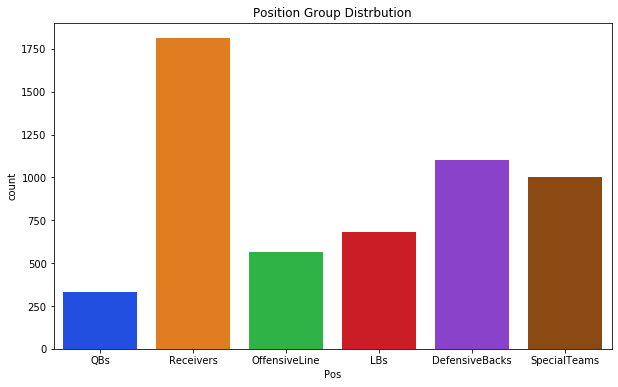

************************************************************
 
1st Round Position Group Count:
Receivers         154
SpecialTeams      125
DefensiveBacks    120
OffensiveLine      90
LBs                65
QBs                59
Name: Pos, dtype: int64
----------------------------------------
1st Round Position Group % to TTL:
Receivers        0.25
SpecialTeams     0.20
DefensiveBacks   0.20
OffensiveLine    0.15
LBs              0.11
QBs              0.10
Name: Pos, dtype: float64
----------------------------------------


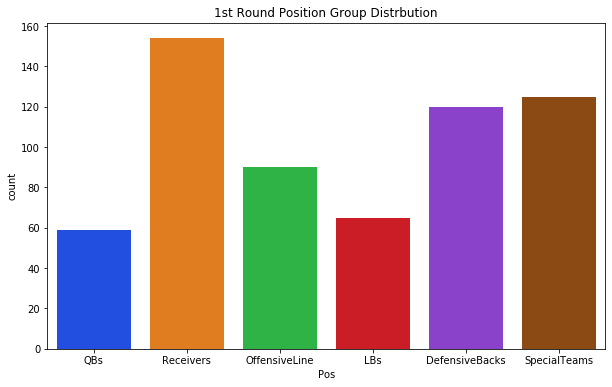

2nd Round Position Group Count:
Receivers         174
DefensiveBacks    129
SpecialTeams       90
LBs                77
OffensiveLine      65
QBs                21
Name: Pos, dtype: int64
----------------------------------------
2nd Round Position Group % to TTL:
Receivers        0.31
DefensiveBacks   0.23
SpecialTeams     0.16
LBs              0.14
OffensiveLine    0.12
QBs              0.04
Name: Pos, dtype: float64
----------------------------------------


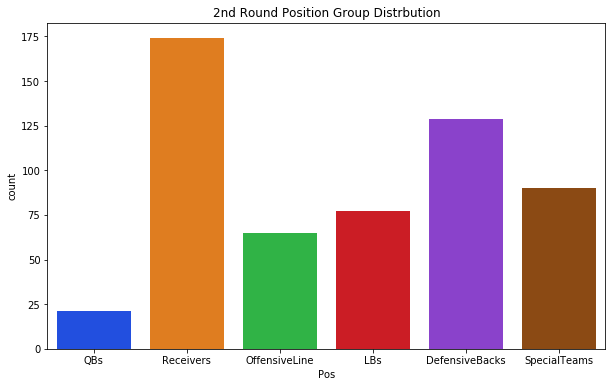

3rd Round Position Group Count:
Receivers         186
DefensiveBacks    126
SpecialTeams      105
LBs                89
OffensiveLine      75
QBs                25
Name: Pos, dtype: int64
----------------------------------------
3rd Round Position Group % to TTL:
Receivers        0.31
DefensiveBacks   0.21
SpecialTeams     0.17
LBs              0.15
OffensiveLine    0.12
QBs              0.04
Name: Pos, dtype: float64
----------------------------------------


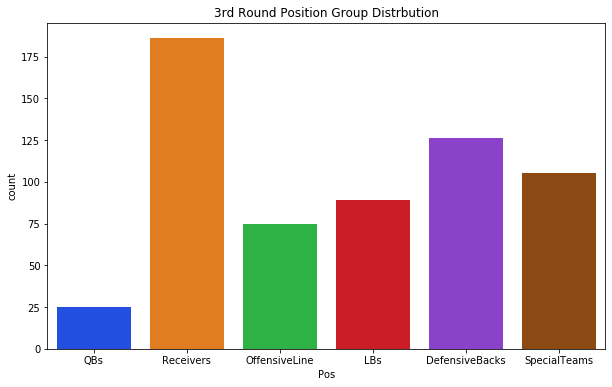

4th Round Position Group Count:
Receivers         201
DefensiveBacks    125
SpecialTeams       91
LBs                81
OffensiveLine      68
QBs                28
Name: Pos, dtype: int64
----------------------------------------
4th Round Position Group % to TTL:
Receivers        0.34
DefensiveBacks   0.21
SpecialTeams     0.15
LBs              0.14
OffensiveLine    0.11
QBs              0.05
Name: Pos, dtype: float64
----------------------------------------


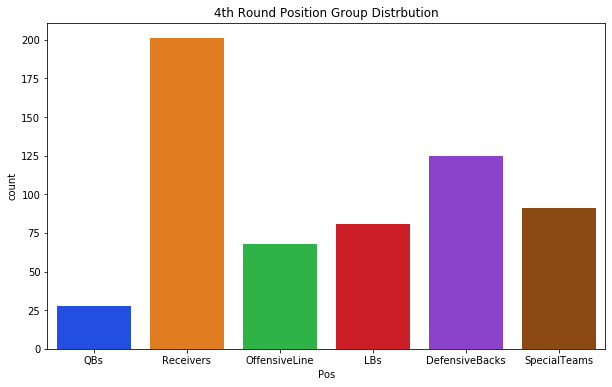

5th Round Position Group Count:
Receivers         155
DefensiveBacks    114
SpecialTeams       88
LBs                80
OffensiveLine      56
QBs                24
Name: Pos, dtype: int64
----------------------------------------
5th Round Position Group % to TTL:
Receivers        0.30
DefensiveBacks   0.22
SpecialTeams     0.17
LBs              0.15
OffensiveLine    0.11
QBs              0.05
Name: Pos, dtype: float64
----------------------------------------


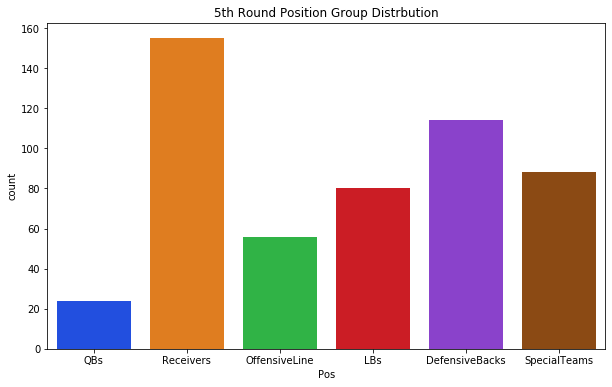

6th Round Position Group Count:
Receivers         141
DefensiveBacks     87
SpecialTeams       86
LBs                50
OffensiveLine      43
QBs                34
Name: Pos, dtype: int64
----------------------------------------
6th Round Position Group % to TTL:
Receivers        0.32
DefensiveBacks   0.20
SpecialTeams     0.20
LBs              0.11
OffensiveLine    0.10
QBs              0.08
Name: Pos, dtype: float64
----------------------------------------


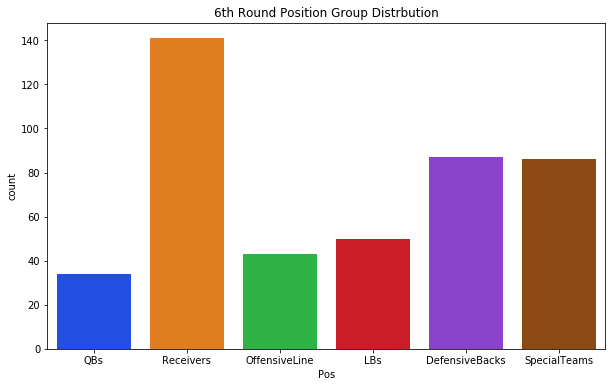

7th Round Position Group Count:
Receivers         161
SpecialTeams       85
DefensiveBacks     71
LBs                50
OffensiveLine      38
QBs                25
Name: Pos, dtype: int64
----------------------------------------
7th Round Position Group % to TTL:
Receivers        0.37
SpecialTeams     0.20
DefensiveBacks   0.17
LBs              0.12
OffensiveLine    0.09
QBs              0.06
Name: Pos, dtype: float64
----------------------------------------


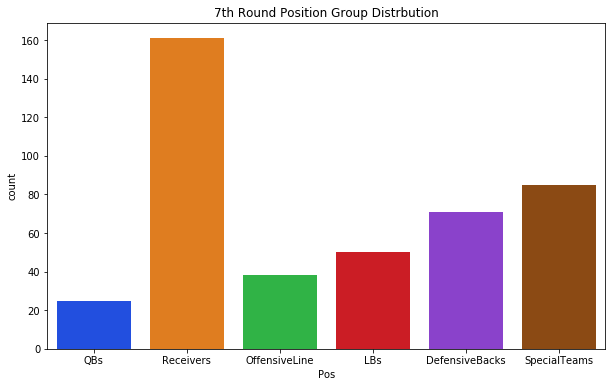

Not Drafted Round Position Group Count:
Receivers         640
SpecialTeams      334
DefensiveBacks    329
LBs               189
OffensiveLine     127
QBs               116
Name: Pos, dtype: int64
----------------------------------------
Not Drafted Round Position Group % to TTL:
Receivers        0.37
SpecialTeams     0.19
DefensiveBacks   0.19
LBs              0.11
OffensiveLine    0.07
QBs              0.07
Name: Pos, dtype: float64
----------------------------------------


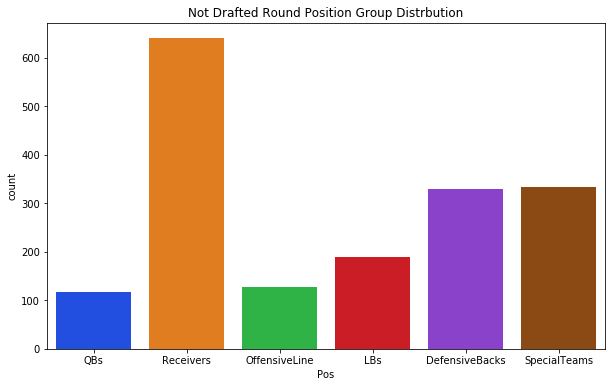

In [34]:
pos_group = draft_data[['Pos', 'Round']]
print('Total Count by Position Group: ')
print(pos_group['Pos'].value_counts())
print('-' * 40)
print('Position Group % to TTL:')
print(pos_group['Pos'].value_counts(normalize=True))
order = ['QBs', 'Receivers', 'OffensiveLine', 'LBs', 'DefensiveBacks', 'SpecialTeams']
plt.figure(figsize=(10, 6))
sns.countplot(pos_group['Pos'], palette = 'bright', order=order)
plt.title('Position Group Distrbution')
plt.savefig('images/PosGroup_Distro')
plt.show()
print('*' * 60)
print(' ')
rounds = ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', 'Not Drafted']
for i in rounds:
    round_df = pos_group[pos_group['Round'] == i]
    print(i + ' Round Position Group Count:')
    print(round_df['Pos'].value_counts())
    print('-' * 40)
    print(i + ' Round Position Group % to TTL:')
    print(round_df['Pos'].value_counts(normalize=True))
    print('-' * 40)
    plt.figure(figsize=(10, 6))
    sns.countplot(round_df['Pos'], palette = 'bright', order=order)
    plt.title(i + ' Round Position Group Distrbution')
    plt.savefig('images/' + i + '_PosGroup_Distro')
    plt.show()

In [230]:
draft_data.to_pickle('cleaned_df')